# Introduction

# Goal.
The goal of this lab is to familiarize yourself with some advanced forms of evolutionary computation (EC). In particular, you will explore the use of Evolution Strategies (ES) and Covariance Matrix Adaptation Evolution Strategies (CMA-ES). You will observe the effects of different forms of self-adaptation and how these are useful for black-box optimization.

Note once again that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* the fitness function $f(\mathbf{x})$, i.e. lower values correspond to a better fitness!

# Exercise 1
In this exercise you will explore the use of Evolution Strategies (ES). ES are a popular class of evolutionary algorithms used for optimization problems. In particular you will explore the popular ($\mu$/$\rho$,$\lambda$)-ES where $\mu$ denotes the number of parents, $\rho\leq\mu$ the number of parents involved in the producing a single offspring (mixing number), $\lambda$ the number of offspring, and *comma* selection is employed.

To start the experiments, run the next cell. Note that, as usual, you may change the seed for the pseudo-random number generator. 

This code will attempt to optimize the 10-dimensional __[Rosenbrock function](http://pythonhosted.org/inspyred/reference.html\#inspyred.benchmarks.Rosenbrock)__ :

$f(x) = \sum_{i=1}^{n-1} [100(x_i^2 - x_{i+1})^2 + (x_i - 1)^2]$
<br>

$x_i \in [-5, 10]$ for $(i=1,...,n)$

using an Evolutionary Strategy without self-adaptation or recombination (which is very similar to the GA you used in the first module's exercises): <br>
$\mu = 20, \lambda = 100, \rho = 1$

Note that while $\rho = 1$, there is no recombination (there is only one parents, thus it will only mutate), if $\rho > 1$ then there will be also recombination (crossover) between parents

Try adjusting the various parameters: $\mu$, $\lambda$, and $\rho$, (by changing, respectively, `args[pop_size]`, `args[num_offspring]`, and `args[mixing_number]` in the next cell. 
- What happens if you make $\lambda$ smaller e.g. $\lambda=\mu$?
- What happens if you increase the mixing number $\rho$?
- Does this confirm or contradict the conclusions you drew in the previous lab?


Try out the different strategy modes (change the parameter `args[strategy_mode]`), and observe how they affect the performance of the algorithm:

- `None` means that there is no self-adaptation
- `es.GLOBAL` means each genome encodes a global step-size (mutation standard deviation)
- `es.INDIVIDUAL` means each genome encodes an independent step-size for each gene.

Note: if you want to change the learning rate $\tau$, you can set `args[tau]`



Best Individual: [ 1.11743286  1.60266843 -0.25553748  0.61748785  1.02354134  0.1050584
  0.02703486 -0.52935684  1.48806366  0.92048462]
Best Fitness: 1318.5057124937985


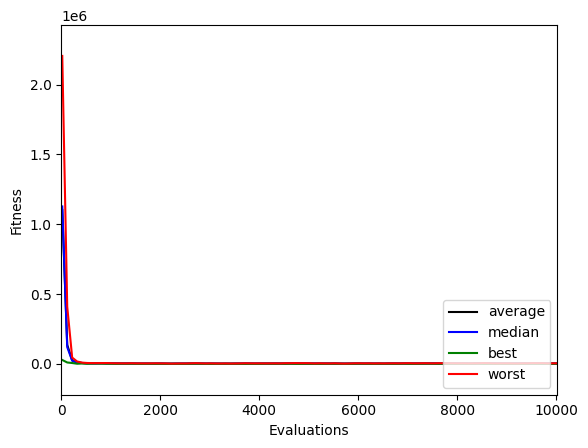

In [1]:
from pylab import *
import sys
from inspyred import ec, benchmarks
import utils.utils_03.plot_utils

from utils.utils_03.es import *
from utils.utils_03.inspyred_utils import NumpyRandomWrapper

display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
Edit this part to do the exercises

"""

num_vars = 10

# parameters for the ES
args = {}
args["max_generations"] = 100
args["sigma"] = 1.0 # default standard deviation

args["pop_size"] = 20 # mu
args["num_offspring"] = 100 #lambda

args["strategy_mode"] = None
#args["strategy_mode"] = GLOBAL
#args["strategy_mode"] = INDIVIDUAL

args["mixing_number"] = 1 #rho
#args["mixing_number"] = 5

#args["problem_class"] = benchmarks.Sphere
args["problem_class"] = benchmarks.Rosenbrock
#args["problem_class"] = benchmarks.Rastrigin

args["replacement_type"] = COMMA
#args["replacement_type"] = PLUS

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'ES'

seed = None
rng = NumpyRandomWrapper(seed)
# Run the ES
best_individual, best_fitness, final_pop = run_es(rng,num_vars=num_vars,
                                       display=display,use_log_scale=True,
                                       **args)

# Display the results
print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)

if display :
    ioff()
    show()

# Exercise 2
In this exercise you will systematically explore some of the intuitions you gained in Exercise 1. By default this code is configured to run $10$ ES runs apiece with each different strategy mode. The best fitnesses of each run are shown in a boxplot similar to what you saw in the first module's exercises.

- How does the self-adaptation strategy influence performance on this problem?
- Does what you see here confirm what you suspected from the previous exercise?


Use the provided code as a template to systematically explore the other parameters.

**Note**: To study the effect of parameters, it's important to change only **one parameter at a time**, i.e. keep everything fixed except for the parameter you want to study, and for each parameter under study create box plots to compare different values.

**Note**: In order to make a fair comparison you must keep the number of function evaluations (i.e., $\lambda$ $\times$ `max_generations`) fixed $^{[1]}$.

- How do the values of $\mu$, $\rho$, and $\lambda$ influence the performance given a particular self-adaptation strategy and other parameters?
- Can you come up with any rules of thumb for choosing these parameters?


In order to see how general your results are you can explore different benchmark problems $^{[2]}$ on different numbers of variables. You can change the problem by changing the parameter `args[problem_class]` and the problem dimension (number of variables) by changing the variable `num_vars` in the next cell. Note that most benchmark problems are *scalable*, i.e. they can be defined for any number of variables.

- Can you find a choice of parameters that works properly across several problems?


---
[1]:
When you compare multiple algorithms on the same problem, the computational budget allotted to any of them should be same, in order to get a fair comparison. So, if you run experiments with different values of $\lambda$, you should adjust `max_generations` accordingly, so that the total number of evaluations is consistent across experiments. E.g.: {$\lambda=50$, `max_generations`$=100$}, {$\lambda=100$, `max_generations`$=50$}, etc. One rule of thumb sometimes used in evolutionary computation papers and black-box optimization competitions is to run each algorithm for $5000 \times n$ fitness evaluations, where $n$ is the problem dimension. Also bear in mind that some algorithms are not generational at all: in those cases, the stop criterion must be expressed in terms of absolute number of evaluations, or as a convergence condition.

[2]:
See __[link](https://pythonhosted.org/inspyred/reference.html\#single-objective-benchmarks)__ for a list of single-objective benchmark problems.

Trying strategy  None
Trying strategy  Global
Trying strategy  Individual


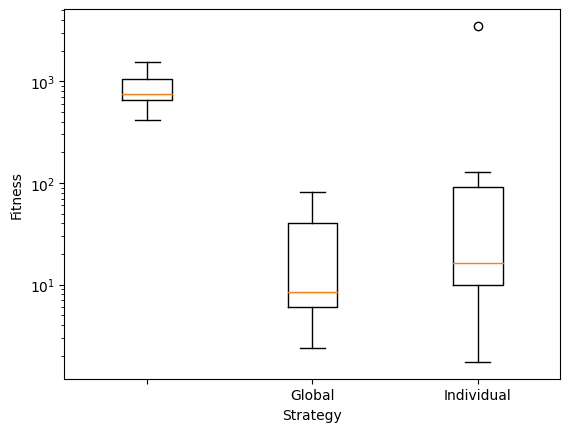

In [2]:
from pylab import *
import sys
from inspyred import ec, benchmarks
import utils.utils_03.plot_utils

from utils.utils_03.es import *
from utils.utils_03.inspyred_utils import NumpyRandomWrapper

display = False # Plot initial and final populations

"""
-------------------------------------------------------------------------
Edit this part to do the exercises

"""

num_vars = 10

# parameters for the ES
args = {}
args["max_generations"] = 100
args["sigma"] = 1.0 # default standard deviation

args["pop_size"] = 20 # mu
args["num_offspring"] = 100 #lambda
#args["mixing_number"] = 5 #rho

strategy_modes = [None, GLOBAL, INDIVIDUAL]

args["mixing_number"] = 1 #rho

#args["problem_class"] = benchmarks.Sphere
args["problem_class"] = benchmarks.Rosenbrock
#args["problem_class"] = benchmarks.Rastrigin

num_runs = 10 # Number of runs to be done for each condition

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'ES'

seed = None 

rng = NumpyRandomWrapper(seed)


# Run the ES *num_runs* times for each strategy mode and record results     
results = []
for strategy_mode in strategy_modes :
    print("Trying strategy ", str(strategy_mode))
    args["strategy_mode"] = strategy_mode
    results.append([run_es(rng,num_vars=num_vars, display=display,**args)
                    for _ in range(num_runs)]) 

best_fitnesses = [[run_result[1] for run_result in runs] 
                  for runs in results]

# Boxplot comparing the best fitnesses
fig = figure('ES (best fitness)')
ax = fig.add_subplot(1,1,1)
ax.boxplot(best_fitnesses)  
ax.set_yscale('log')
ax.set_xticklabels(strategy_modes)
#ax.set_xticklabels( map(lambda s: str(s), strategy_modes ) )
ax.set_xlabel('Strategy')
ax.set_ylabel('Fitness')
ioff()
show()

# Exercise 3

In this exercise you will explore the use of the Covariance Matrix Adaptation Evolution Strategy (CMA-ES). As described in the lecture CMA-ES is currently one of the most successful evolutionary optimizers. By using statistics gathered over generations it is able to adapt a covariance matrix in a completely derandomized way (in contrast to the ES where we were just exploring).

While *inspyred* does not include a native implementation of CMA-ES, we have made one available to you through a similar interface as you have been using so far. An example of proper usage is provided in next cell.

Using this and the previous exercise as templates compare the performance of CMA-ES to the other Evolution Strategies you were just investigating.

- Can CMA-ES find optima to different problems with fewer function evaluations?
- How do these differences change with different pop. sizes and problem dimensions?


mu = 20.000000
(20_w,100)-CMA-ES (mu_w=16.8,w_1=10%) in dimension 10 (seed=19468, Mon Sep 30 16:37:18 2024)
Best Individual: [ 9.88156301e-01  9.61999874e-01  9.58474209e-01  9.19730344e-01
  8.15786254e-01  6.47515821e-01  4.33336545e-01  1.52728619e-01
  6.43740860e-04 -1.96077644e-02]
Best Fitness: 2.691327401813309


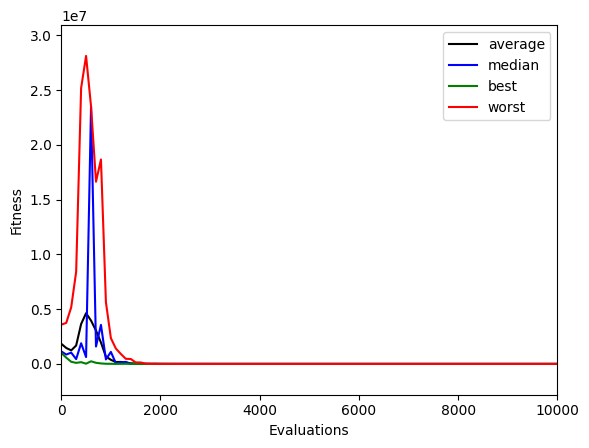

In [2]:
from pylab import *
import sys
from inspyred import benchmarks

from utils.utils_03.cma_es import *
from utils.utils_03.es import *
from utils.utils_03.inspyred_utils import NumpyRandomWrapper

display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
Edit this part to do the exercises

"""

num_vars = 10

# parameters for CMA-ES
args = {}
args["max_generations"] = 100
args["sigma"] = 1.0 # default standard deviation

args["pop_size"] = 20 #mu
args["num_offspring"] = 100 #lambda

#args["problem_class"] = benchmarks.Sphere
args["problem_class"] = benchmarks.Rosenbrock
#args["problem_class"] = benchmarks.Rastrigin

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'CMA-ES'

seed = None
rng = NumpyRandomWrapper(seed)
# Run CMA-ES
best_individual, best_fitness = run(rng,num_vars=num_vars,
                                       display=display,use_log_scale=True,
                                       **args)

# Display the results
print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)

if display :
    ioff()
    show()

## Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions.

- Do the observations you made while varying μ, ρ, and λ confirm or contradict the conclusions you drew in the previous module's exercises?
- What are the advantages of self-adaptation in evolutionary computation?
- In what ways might self-adaptation be occurring in biological organisms?
- Compare the different self-adaptation strategies explored in this exercise. 
In what ways are certain strategies better than others for optimization? 
In what ways are certain strategies more biologically plausible than others?
- Describe what reasons may contribute to better performance of CMA-ES and what can be the conditions 
when CMA-ES is not better than a basic ES.